# Project title: Price model for airbnb listings in Geneva

## Exploratory Data Analysis (EDA)

### Libraries and settings

In [1]:
# Libraries
import os
import json
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/workspaces/project_arm_airbnb/data


### Import csv file 'listings_with_distances'

In [2]:
# Import data from csv file 'listings_with_distances.csv'
df_orig = pd.read_csv('listings_with_distances.csv')
print(df_orig.shape)
df_orig.head()

(2024, 20)


,id,neighbourhood_cleansed,lat,lon,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,lake_access,num_amenities,dist_ta,dist_pb,num_ta,num_stops
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,0,1,0,22,409.552941,120.893645,4,3
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,0,1,0,51,375.547668,465.095061,1,0
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,0,1,0,26,564.152315,460.109880,0,0
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,1,1,1,48,6694.037169,162.973109,0,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,0,1,1,26,795.419536,127.984620,0,2


## Univariate non-graphical EDA

### Summary statistics

In [3]:
# summary statistics of numeric variables
df_orig.describe()

,id,lat,lon,price,accommodates,bathrooms,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,lake_access,num_amenities,dist_ta,dist_pb,num_ta,num_stops
count,2.024000e+03,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000,2024.000000
mean,2.992165e+07,46.206284,6.143972,126.394269,2.657115,1.201334,4.615577,4.782021,0.348814,10.613636,0.161067,21.853755,1073.613012,657.237024,1.076087,1.137846
std,1.529775e+07,0.020470,0.027914,134.113890,1.507280,0.497997,0.646705,0.379010,0.476713,25.314198,0.367684,10.491310,1271.383805,1034.649079,2.184550,1.751285
min,4.251500e+04,46.138820,5.973220,10.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,8.585986,14.723122,0.000000,0.000000
25%,1.723789e+07,46.195377,6.132483,70.000000,2.000000,1.000000,4.615577,4.782021,0.000000,1.000000,0.000000,14.000000,394.674935,191.111468,0.000000,0.000000
50%,3.307640e+07,46.204440,6.144230,99.000000,2.000000,1.000000,4.670000,4.782021,0.000000,1.000000,0.000000,20.000000,711.366700,343.589753,0.000000,0.000000
75%,4.306113e+07,46.212587,6.155158,134.000000,4.000000,1.000000,4.940000,5.000000,1.000000,3.000000,0.000000,28.000000,1163.921594,623.117686,1.000000,2.000000
max,5.069686e+07,46.346590,6.269240,3000.000000,11.000000,6.000000,5.000000,5.000000,1.000000,102.000000,1.000000,71.000000,9560.756727,9077.884655,12.000000,10.000000


### Statistical measures (min, max, std, mean, median, count) for price and accomodates

In [4]:
# Price
print('Price:',
      'Count:', round(df_orig.price.count(), 1),
      'Min:', round(df_orig.price.min(), 1),
      'Max:', round(df_orig.price.max(), 1),
      'Mean:', round(df_orig.price.mean(), 1),
      'Median:', round(df_orig.price.median(), 1),
      'Std:', round(df_orig.price.std(), 1))

# Accommodates
print('Accomodates:',
      'Count:', round(df_orig.accommodates.count(), 1),
      'Min:', round(df_orig.accommodates.min(), 1),
      'Max:', round(df_orig.accommodates.max(), 1),
      'Mean:', round(df_orig.accommodates.mean(), 1),
      'Median:', round(df_orig.accommodates.median(), 1),
      'Std:', round(df_orig.accommodates.std(), 1))

Price: Count: 2024 Min: 10.0 Max: 3000.0 Mean: 126.4 Median: 99.0 Std: 134.1
Accomodates: Count: 2024 Min: 1 Max: 11 Mean: 2.7 Median: 2.0 Std: 1.5


### Skewness

In [5]:
df_orig[['price','accommodates']].skew()

price           9.520778
accommodates    1.654079
dtype: float64

### Kurtosis

In [6]:
df_orig[['price','accommodates']].kurtosis()

price           152.575145
accommodates      3.776247
dtype: float64

### Create subset for further analysis without outliers

In [16]:
# create a subset of the data with prices between 20 and 200
df_sub = df_orig[(df_orig['price'] >= 20) & (df_orig['price'] <= 200)]

# create a subset of the data only with listings with room type Entire home/apt and room type Private room
df = df_sub[(df_sub['room_type'] == 'Entire home/apt') | (df_sub['room_type'] == 'Private room')]
df.head()

,id,neighbourhood_cleansed,lat,lon,property_type,room_type,price,accommodates,bathrooms,amenities,review_scores_rating,review_scores_location,instant_bookable,calculated_host_listings_count,lake_access,num_amenities,dist_ta,dist_pb,num_ta,num_stops
0,42515,Commune de Genève,46.20140,6.15507,Private room in apartment,Private room,72.0,1,1.5,"[""Cable TV"", ""Dishes and silverware"", ""Washer""...",4.69,4.79,0,1,0,22,409.552941,120.893645,4,3
1,44959,Commune de Genève,46.19704,6.16076,Private room in apartment,Private room,68.0,1,1.5,"[""Extra pillows and blankets"", ""Cable TV"", ""Po...",4.87,4.72,0,1,0,51,375.547668,465.095061,1,0
2,194110,Commune de Genève,46.20420,6.16067,Entire apartment,Entire home/apt,135.0,4,1.0,"[""Extra pillows and blankets"", ""Cable TV"", ""Di...",4.50,4.85,0,1,0,26,564.152315,460.109880,0,0
3,276025,Versoix,46.27944,6.16724,Entire apartment,Entire home/apt,65.0,5,1.0,"[""Extra pillows and blankets"", ""Portable fans""...",4.62,4.75,1,1,1,48,6694.037169,162.973109,0,1
4,325986,Commune de Genève,46.21428,6.14610,Entire apartment,Entire home/apt,150.0,2,1.5,"[""Dishes and silverware"", ""Washer"", ""TV"", ""Smo...",4.84,4.76,0,1,1,26,795.419536,127.984620,0,2


In [17]:
# show type of each column
df.dtypes

id                                  int64
neighbourhood_cleansed             object
lat                               float64
lon                               float64
property_type                      object
room_type                          object
price                             float64
accommodates                        int64
bathrooms                         float64
amenities                          object
review_scores_rating              float64
review_scores_location            float64
instant_bookable                    int64
calculated_host_listings_count      int64
lake_access                         int64
num_amenities                       int64
dist_ta                           float64
dist_pb                           float64
num_ta                              int64
num_stops                           int64
dtype: object

In [18]:
# Skewness
df[['price','accommodates']].skew()


price           0.682252
accommodates    1.436326
dtype: float64

In [19]:
# Kurtosis
df[['price','accommodates']].kurtosis()

price           0.040476
accommodates    3.079755
dtype: float64

## Univariate grahical EDA

### Distribution / Histogram of price

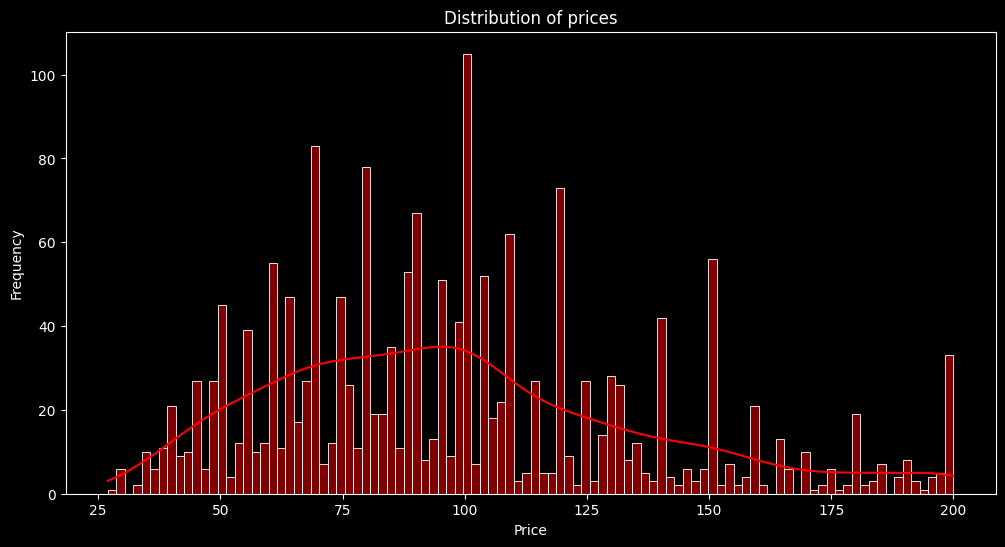

In [59]:
# plot the distribution of the price column
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
sns.histplot(df['price'], bins=100, color='red', kde=True)
plt.title('Distribution of prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

### Quantile-quantile plot of price

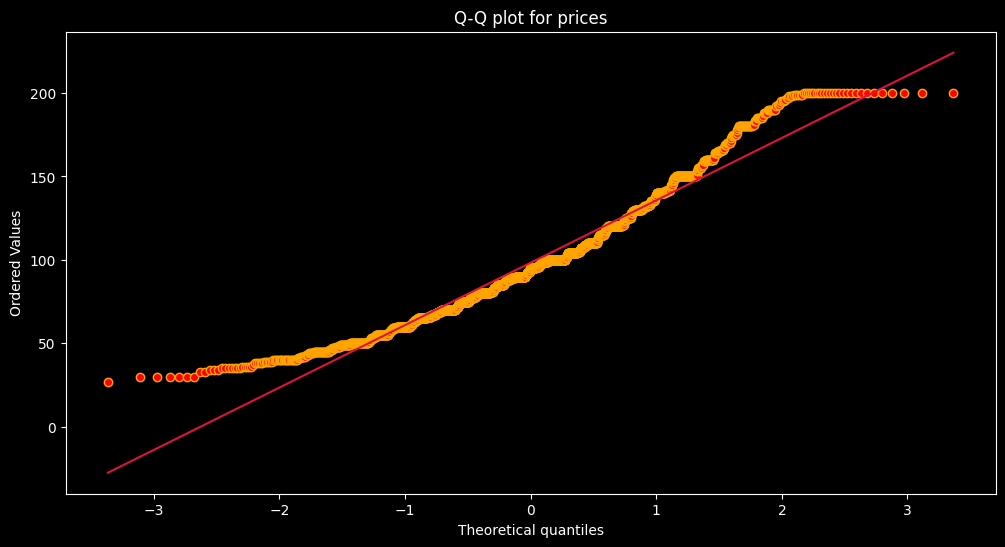

In [64]:
# create quantile-quantile plot for the price column
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
stats.probplot(df['price'], dist="norm", plot=plt)
plt.gca().get_lines()[1].set_color('crimson')
plt.gca().get_lines()[0].set_markerfacecolor('red')
plt.gca().get_lines()[0].set_markeredgecolor('orange')
plt.title('Q-Q plot for prices')
plt.show()

### Neighborhood bar chart

In [22]:
# print the number of listings in each neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)

neighbourhood_cleansed
Commune de Genève     1241
Carouge                 91
Vernier                 51
Grand-Saconnex          48
Lancy                   46
Thônex                  42
Chêne-Bougeries         34
Meyrin                  34
Versoix                 31
Onex                    21
Pregny-Chambésy         17
Veyrier                 16
Cologny                 15
Plan-les-Ouates         14
Chêne-Bourg             13
Bellevue                11
Collonge-Bellerive       9
Bardonnex                8
Puplinge                 8
Bernex                   7
Corsier                  6
Genthod                  6
Satigny                  4
Meinier                  4
Collex-Bossy             4
Confignon                4
Soral                    4
Troinex                  3
Avully                   3
Anières                  3
Choulex                  2
Chancy                   2
Hermance                 2
Dardagny                 2
Vandoeuvres              1
Perly-Certoux            1
Jussy

In [23]:
# list the 5 most common neighborhoods and summarize the others as 'Other'
top_5_neighborhoods = neighborhood_counts.head(5).index
df['neighbourhood_cleansed'] = df['neighbourhood_cleansed'].apply(lambda x: x if x in top_5_neighborhoods else 'Other')
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()
print(neighborhood_counts)

neighbourhood_cleansed
Commune de Genève    1241
Other                 336
Carouge                91
Vernier                51
Grand-Saconnex         48
Lancy                  46
Name: count, dtype: int64


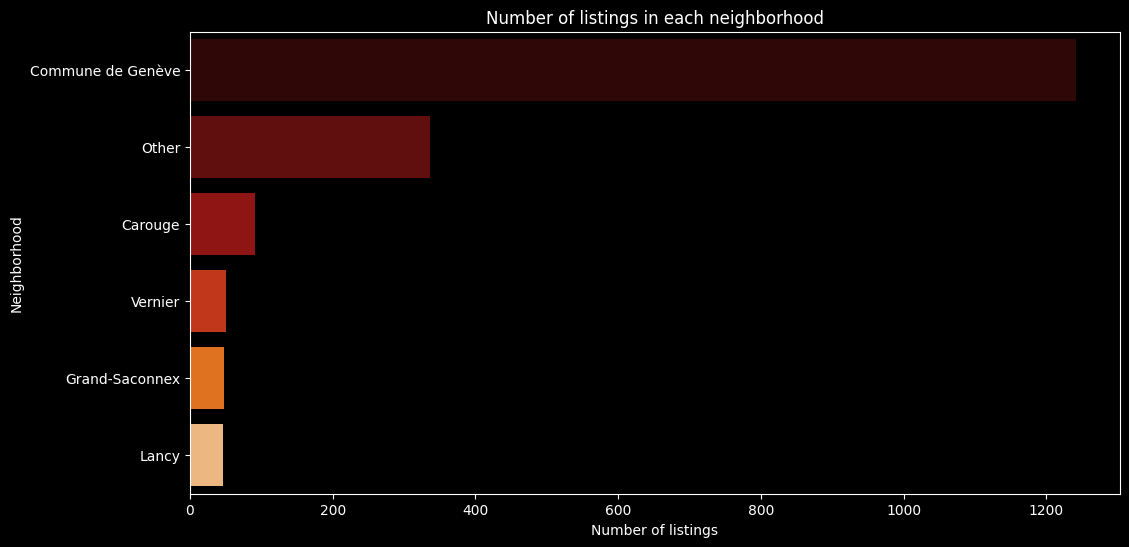

In [37]:
# plot the numnber of the neighbourhood_cleansed column and sort by the number of listings, create a category 'Others' that sums up the listings of neighbourhoods with less than 50 listings
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
sns.countplot(data=df, y='neighbourhood_cleansed', order=neighborhood_counts.index, palette='gist_heat')
plt.title('Number of listings in each neighborhood')
plt.xlabel('Number of listings')
plt.ylabel('Neighborhood')
plt.show()

### Property types bar chart

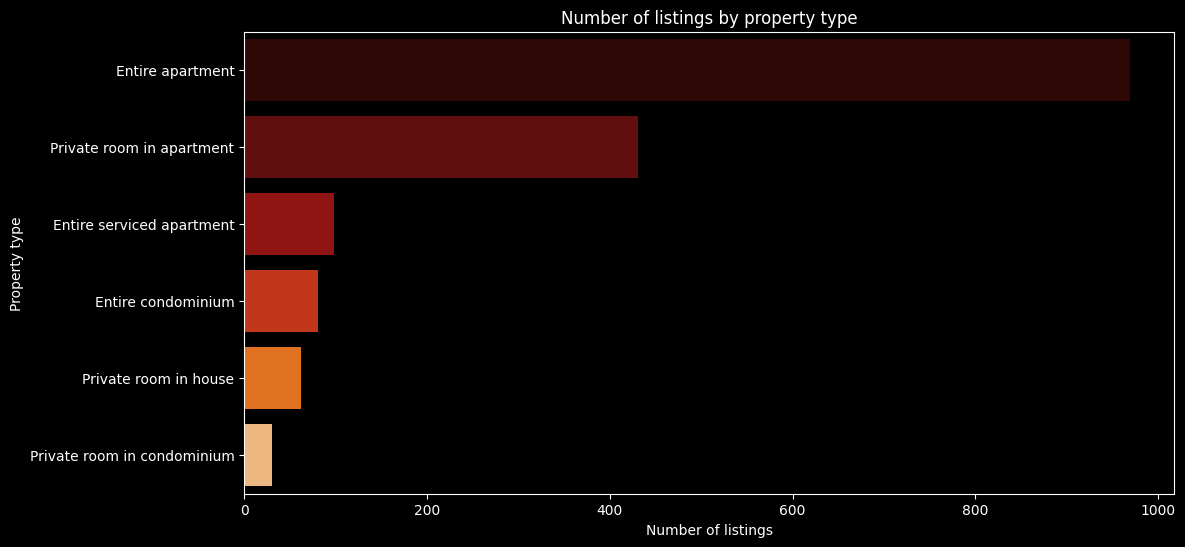

In [38]:
# plot the number of listings depending on the property type and only include property types with more than 25 listings
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
sns.countplot(data=df, y='property_type', order=df['property_type'].value_counts()[df['property_type'].value_counts() > 25].index, palette='gist_heat')
plt.title('Number of listings by property type')
plt.xlabel('Number of listings')
plt.ylabel('Property type')
plt.show()

### Histogram of 'accomodates'

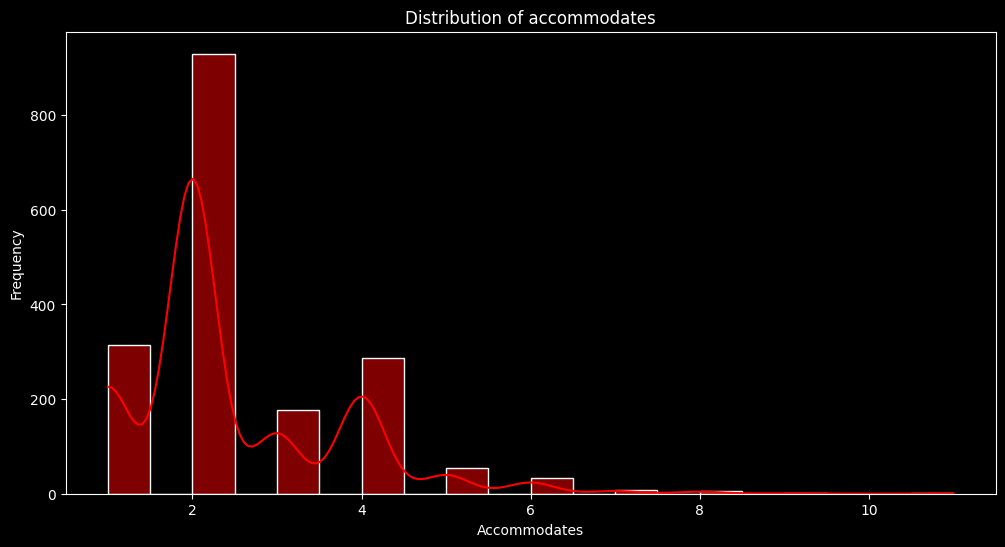

In [45]:
# create a histogram of the number of people that can be accommodated in the listings
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
sns.histplot(df['accommodates'], bins=20, color='red', kde=True)
plt.title('Distribution of accommodates')
plt.xlabel('Accommodates')
plt.ylabel('Frequency')
plt.show()

## Multivariate non-graphical EDA

### Pivot tables

In [46]:
# Using pivot_table to reshape the data and calculate means
pivot_table = df.pivot_table(index='neighbourhood_cleansed', columns='room_type', values='price', aggfunc=np.mean)


In [47]:
pd.pivot_table(df[['neighbourhood_cleansed', 'room_type', 'price', 'accommodates', 'review_scores_rating', 'instant_bookable', 'num_amenities', 'lake_access']],
               index=['neighbourhood_cleansed', 'room_type'],
               values=['price', 'review_scores_rating', 'accommodates', 'num_amenities', 'lake_access', 'instant_bookable'],
               aggfunc=(np.mean, 'count'))

accommodates            \
                                              count      mean   
neighbourhood_cleansed room_type                                
Carouge                Entire home/apt           68  2.308824   
                       Private room              23  1.608696   
Commune de Genève      Entire home/apt          907  2.715546   
                       Private room             334  1.658683   
Grand-Saconnex         Entire home/apt           13  3.846154   
                       Private room              35  2.057143   
Lancy                  Entire home/apt           23  3.565217   
                       Private room              23  1.869565   
Other                  Entire home/apt          186  3.274194   
                       Private room             150  1.753333   
Vernier                Entire home/apt           15  4.133333   
                       Private room              36  1.638889   

                                       instant_bookable           lake_access  \
                                                  count      mean       count   
neighbourhood_cleansed room_type                                                
Carouge                Entire home/apt               68  0.441176          68   
                       Private room                  23  0.043478          23   
Commune de Genève      Entire home/apt              907  0.388093         907   
                       Private room                 334  0.296407         334   
Grand-Saconnex         Entire home/apt               13  0.461538          13   
                       Private room                  35  0.428571          35   
Lancy                  Entire home/apt               23  0.391304          23   
                       Private room                  23  0.347826          23   
Other                  Entire home/apt              186  0.279570         186   
                       Private room                 150  0.366667         150   
Vernier                Entire home/apt               15  0.266667          15   
                       Private room                  36  0.250000          36   

                                                 num_amenities             \
                                            mean         count       mean   
neighbourhood_cleansed room_type                                            
Carouge                Entire home/apt  0.029412            68  20.705882   
                       Private room     0.000000            23  22.869565   
Commune de Genève      Entire home/apt  0.202867           907  21.699008   
                       Private room     0.203593           334  20.526946   
Grand-Saconnex         Entire home/apt  0.000000            13  25.461538   
                       Private room     0.085714            35  24.742857   
Lancy                  Entire home/apt  0.043478            23  21.173913   
                       Private room     0.000000            23  19.782609   
Other                  Entire home/apt  0.059140           186  22.919355   
                       Private room     0.093333           150  20.360000   
Vernier                Entire home/apt  0.000000            15  23.200000   
                       Private room     0.000000            36  18.055556   

                                       price             review_scores_rating  \
                                       count        mean                count   
neighbourhood_cleansed room_type                                                
Carouge                Entire home/apt    68  104.235294                   68   
                       Private room       23   58.347826                   23   
Commune de Genève      Entire home/apt   907  112.370452                  907   
                       Private room      334   74.745509                  334   
Grand-Saconnex         Entire home/apt    13  116.692308                   13   
                       Private room       3

### Correlation matrix

In [48]:
corr = df[['accommodates', 
          'num_amenities', 
          'price', 
          'review_scores_rating',
          'review_scores_location',
          'bathrooms']].cov().corr()
corr

,accommodates,num_amenities,price,review_scores_rating,review_scores_location,bathrooms
accommodates,1.000000,0.099539,0.997206,0.905855,0.973852,0.995393
num_amenities,0.099539,1.000000,0.048055,0.368594,0.139068,0.152181
price,0.997206,0.048055,1.000000,0.900345,0.978892,0.991536
review_scores_rating,0.905855,0.368594,0.900345,1.000000,0.947628,0.910659
review_scores_location,0.973852,0.139068,0.978892,0.947628,1.000000,0.968324
bathrooms,0.995393,0.152181,0.991536,0.910659,0.968324,1.000000


### Correlation heat map

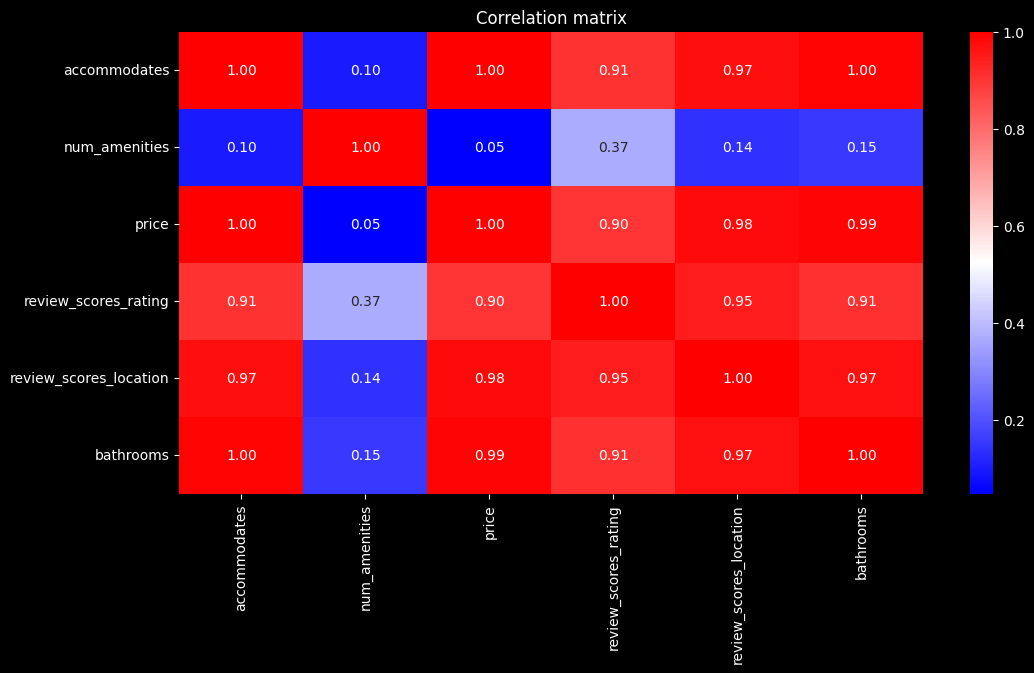

In [70]:
# create a heatmap of the correlation matrix
plt.figure(figsize=(12, 6))
plt.style.use('dark_background')
sns.heatmap(corr, annot=True, cmap='bwr', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

### Covariance Matrix

In [49]:
cov = df[['accommodates', 
          'num_amenities', 
          'price', 
          'review_scores_rating',
          'review_scores_location',
          'bathrooms']].cov()
cov

,accommodates,num_amenities,price,review_scores_rating,review_scores_location,bathrooms
accommodates,1.563789,1.797075,22.025494,-0.005365,-0.009963,0.095180
num_amenities,1.797075,103.519653,24.827545,0.562713,0.163767,0.236617
price,22.025494,24.827545,1452.937716,1.347663,0.969194,1.581396
review_scores_rating,-0.005365,0.562713,1.347663,0.394831,0.117040,0.002247
review_scores_location,-0.009963,0.163767,0.969194,0.117040,0.154997,0.002984
bathrooms,0.095180,0.236617,1.581396,0.002247,0.002984,0.128816


## Multivariate graphical EDA

### Scatterplot-matrix (seaborn)

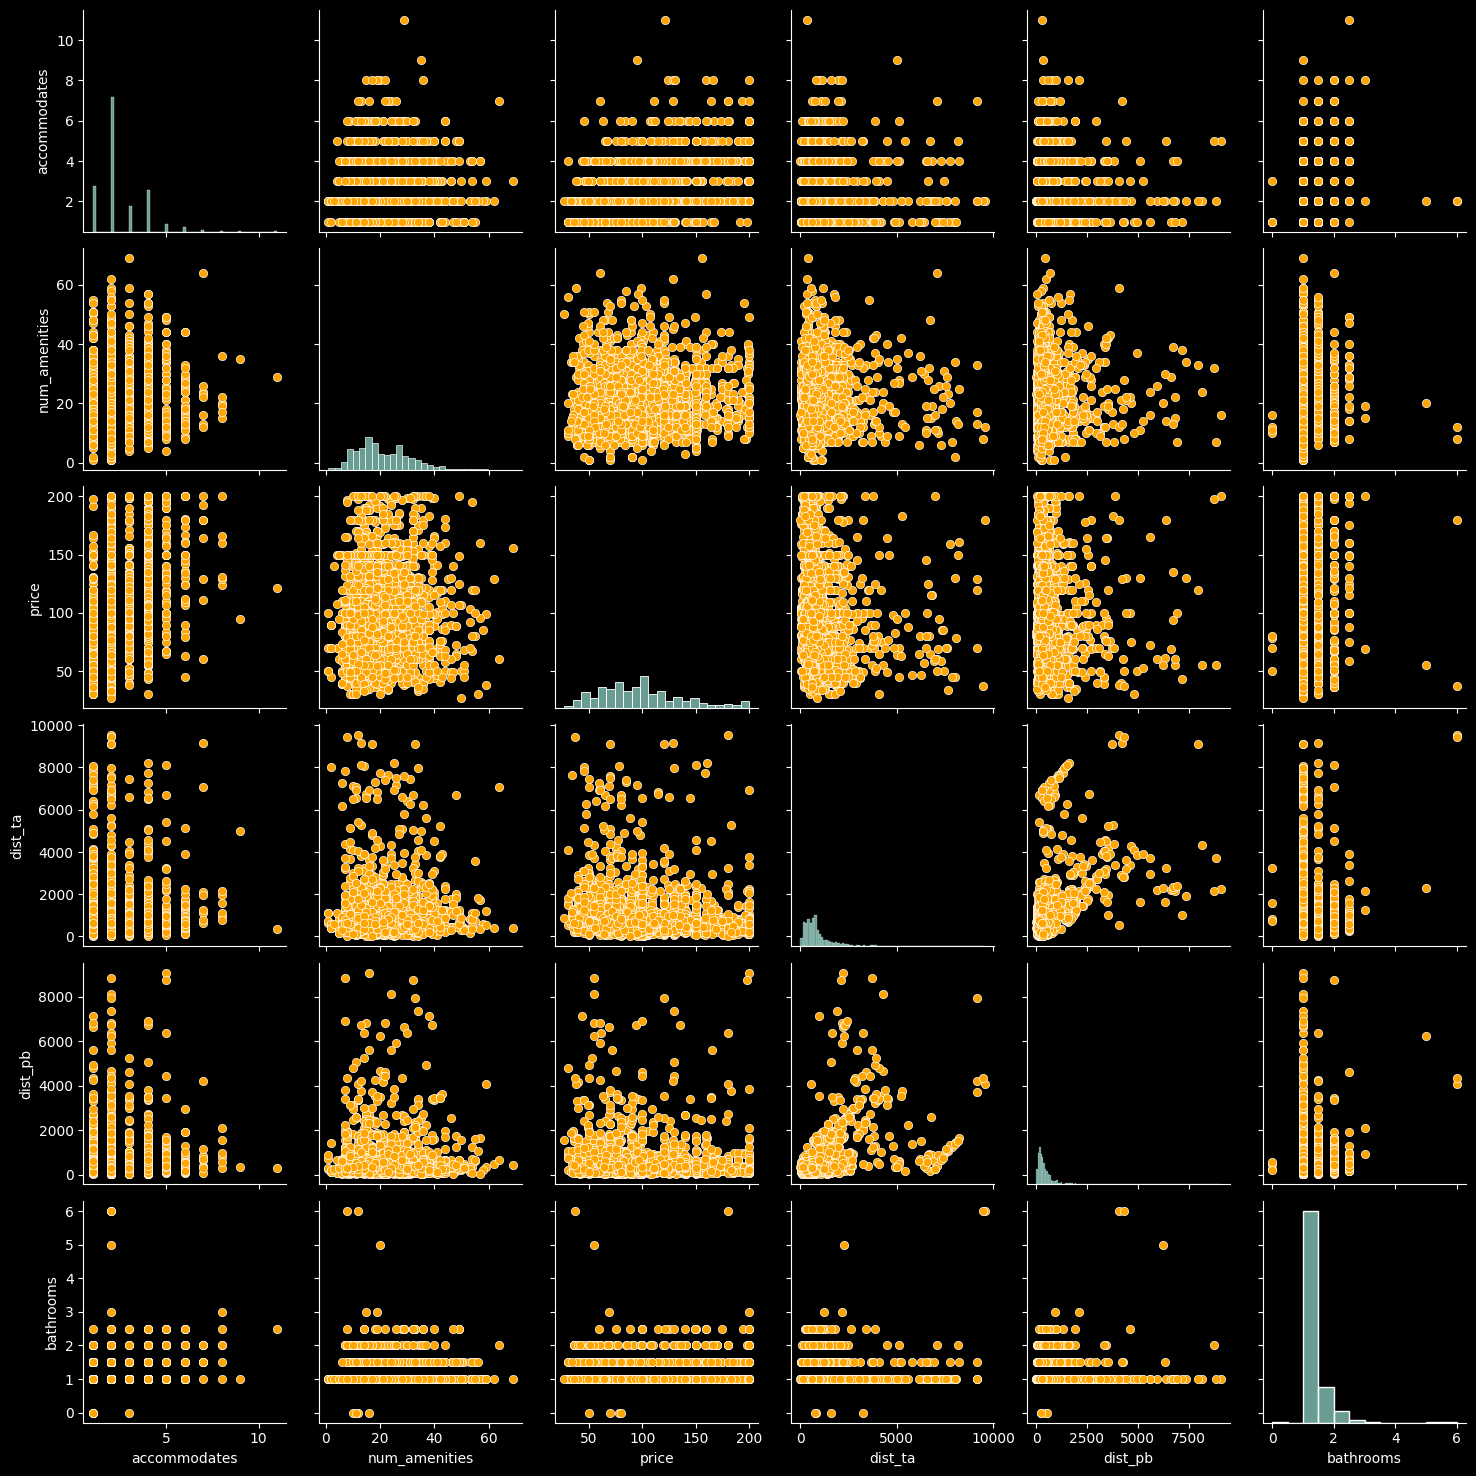

In [57]:
# scatterplot matrix and use color red 
sns.pairplot(df[['accommodates', 
                 'num_amenities', 
                 'price', 
                 'dist_ta',
                 'dist_pb',
                 'bathrooms']], plot_kws={'color':'orange'})
plt.show()

### Jupyter notebook --footer info-- 

In [201]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.5.0-1025-azure
Datetime: 2025-01-08 15:37:33
Python Version: 3.11.10
-----------------------------------
